##### Created on 4th Dec 2022
##### Course work: Implementation of Lagrange's polynomial and draw a plot of the polynomial through your jupyter notebook environment.
##### @author: Sanjjushri

In [93]:
import numpy as np
from matplotlib.pyplot import scatter
import matplotlib.pyplot as plt

In [137]:
#spreading the curve between -50 to +50 on the x and y axis (random)
x_axis = np.array([-50, 50])
y_axis = np.array([-50, 50])

In [138]:
means = [x_axis.mean(), y_axis.mean()]  
stds  = [x_axis.std() / 3, y_axis.std() / 3] 

correlation = 0.9        
covs = [[stds[0]**2, stds[0]*stds[1]*correlation], 
        [stds[0]*stds[1]*correlation, stds[1]**2]] 

In [139]:
random_points_lst = np.random.multivariate_normal(means, covs, 3).T

In [140]:
class LagrangePoly:

    def __init__(self, X, Y):
        self.n = len(X)
        self.X = np.array(X)
        self.Y = np.array(Y)

    def basis(self, x, j):
        b = [(x - self.X[ele]) / (self.X[j] - self.X[ele])
             for ele in range(self.n) if ele != j]
        return np.prod(b, axis=0) * self.Y[j]

    def interpolate(self, x):
        b = [self.basis(x, j) for j in range(self.n)]
        return np.sum(b, axis=0)

In [141]:
X  = random_points_lst[0]
Y  = random_points_lst[1]

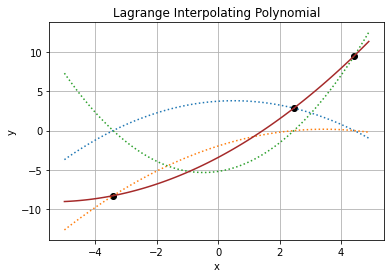

In [143]:
lp = LagrangePoly(X, Y)

x_pl = np.arange(-50, 50) / 10

plt.scatter(X, Y, c='k')
plt.title("Lagrange Interpolating Polynomial")
plt.plot(x_pl, lp.basis(x_pl, 0), linestyle=':')
plt.plot(x_pl, lp.basis(x_pl, 1), linestyle=':')
plt.plot(x_pl, lp.basis(x_pl, 2), linestyle=':')
plt.plot(x_pl, lp.interpolate(x_pl), 'brown')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()